In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import models.data as models
import math
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [107]:
df = pd.read_csv('C:\School\BigData\Big_Data\male.csv', usecols=['stature', 'weightkg', 'chestcircumference'])
df.rename(columns={'weightkg':'Weight', 'stature':'Length', 'chestcircumference': 'Chest'}, inplace=True)
df['Weight'] = df['Weight'].multiply(0.1)
df['Length'] = df['Length'].multiply(0.1)
df['Chest'] = df['Chest'].multiply(0.1)

df.head()

,Chest,Length,Weight
0,107.4,177.6,81.5
1,102.1,170.2,72.6
2,112.0,173.5,92.9
3,111.4,165.5,79.4
4,104.8,191.4,94.6


In [108]:
people = []
df['Size'] = ''
for row in df.itertuples():
    chestcircumference = row[1]
    height = row[2]
    weight = row[3]

    person = models.Male_Shirt_Chest(weight, height, chestcircumference)
    people.append(person)

everyones_size = []
for person in people:
    everyones_size.append(person.size)
df['Size'] = everyones_size
df.tail(20)

,Chest,Length,Weight,Size
4062,106.4,187.4,96.2,XXXLARGE
4063,103.1,181.6,80.9,LARGE
4064,101.0,174.0,79.1,LARGE
4065,95.3,168.1,68.0,MEDIUM
4066,96.9,165.5,65.6,MEDIUM
4067,101.2,176.3,84.1,LARGE
4068,88.4,174.6,58.8,SMALL
4069,96.9,173.3,73.8,MEDIUM
4070,93.4,175.7,67.2,MEDIUM
4071,90.7,156.7,62.0,SMALL


In [109]:
#0 = "XSMALL"
#1 = "SMALL"
#2 = "MEDIUM"
#3 = "LARGE"
#4 = "XLARGE"
#5 = "XXLARGE"
#6 = "XXXLARGE"

size_label = []
for thing in df.itertuples():
    if thing[4] == 'XSMALL':
        size_label.append(0)
    if thing[4] == 'SMALL':
        size_label.append(1)
    if thing[4] == 'MEDIUM':
        size_label.append(2)
    if thing[4] == 'LARGE':
        size_label.append(3)
    if thing[4] == 'XLARGE':
        size_label.append(4)
    if thing[4] == 'XXLARGE':
        size_label.append(5)
    if thing[4] == 'XXXLARGE':
        size_label.append(6)

df['size_label'] = size_label

In [110]:
df.head()

,Chest,Length,Weight,Size,size_label
0,107.4,177.6,81.5,XLARGE,4
1,102.1,170.2,72.6,LARGE,3
2,112.0,173.5,92.9,XXLARGE,5
3,111.4,165.5,79.4,XXLARGE,5
4,104.8,191.4,94.6,XXLARGE,5


In [111]:
x = df
y = df[['size_label']].copy()
x.drop(['Size'], axis=1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=324)

In [112]:
decision_tree_classifier = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)

In [113]:
y_predicted = decision_tree_classifier.predict(X_test)

In [114]:
accuracy_score(y_test, y_predicted)*100

100.0

[Text(0.7, 0.9166666666666666, 'X[3] <= 5.5\ngini = 0.807\nsamples = 2734\nvalue = [8, 112, 435, 635, 518, 373, 653]'),
 Text(0.6, 0.75, 'X[3] <= 3.5\ngini = 0.766\nsamples = 2081\nvalue = [8, 112, 435, 635, 518, 373, 0]'),
 Text(0.4, 0.5833333333333334, 'X[3] <= 2.5\ngini = 0.573\nsamples = 1190\nvalue = [8, 112, 435, 635, 0, 0, 0]'),
 Text(0.3, 0.4166666666666667, 'X[3] <= 1.5\ngini = 0.345\nsamples = 555\nvalue = [8, 112, 435, 0, 0, 0, 0]'),
 Text(0.2, 0.25, 'X[3] <= 0.5\ngini = 0.124\nsamples = 120\nvalue = [8, 112, 0, 0, 0, 0, 0]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0, 0, 0, 0]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 112\nvalue = [0, 112, 0, 0, 0, 0, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 435\nvalue = [0, 0, 435, 0, 0, 0, 0]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 635\nvalue = [0, 0, 0, 635, 0, 0, 0]'),
 Text(0.8, 0.5833333333333334, 'X[3] <= 4.5\ngini = 0.487\nsamples = 891\nvalue = [0, 0, 0, 0, 5

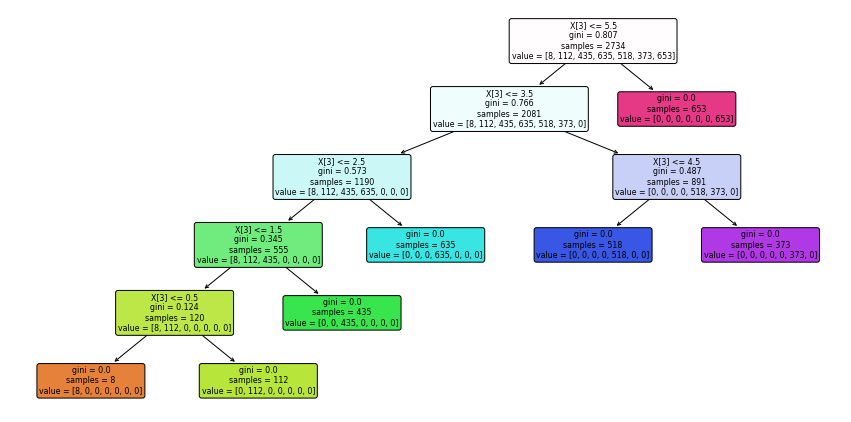

In [115]:
plt.figure(figsize=(15,7.5))
plot_tree(decision_tree_classifier,
          filled=True,
          rounded=True)

In [116]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.018264)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

[Text(0.6666666666666666, 0.9, 'X[3] <= 5.5\ngini = 0.807\nsamples = 2734\nvalue = [8, 112, 435, 635, 518, 373, 653]'),
 Text(0.5555555555555556, 0.7, 'X[3] <= 3.5\ngini = 0.766\nsamples = 2081\nvalue = [8, 112, 435, 635, 518, 373, 0]'),
 Text(0.3333333333333333, 0.5, 'X[3] <= 2.5\ngini = 0.573\nsamples = 1190\nvalue = [8, 112, 435, 635, 0, 0, 0]'),
 Text(0.2222222222222222, 0.3, 'X[3] <= 1.5\ngini = 0.345\nsamples = 555\nvalue = [8, 112, 435, 0, 0, 0, 0]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.124\nsamples = 120\nvalue = [8, 112, 0, 0, 0, 0, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 435\nvalue = [0, 0, 435, 0, 0, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 635\nvalue = [0, 0, 0, 635, 0, 0, 0]'),
 Text(0.7777777777777778, 0.5, 'X[3] <= 4.5\ngini = 0.487\nsamples = 891\nvalue = [0, 0, 0, 0, 518, 373, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 518\nvalue = [0, 0, 0, 0, 518, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamp

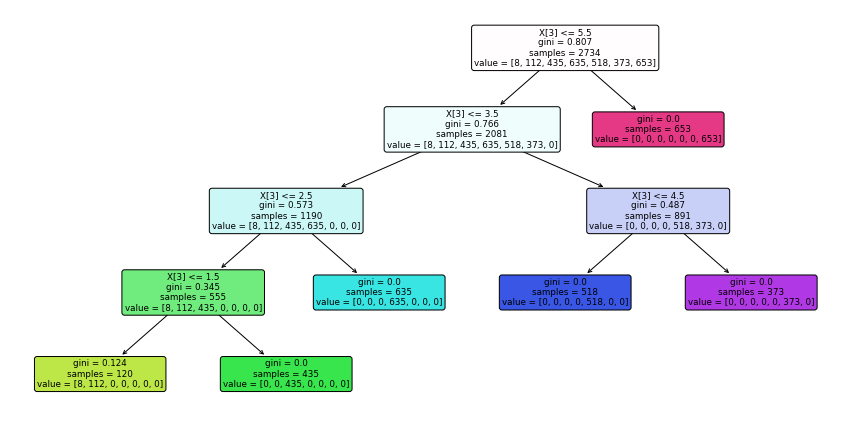

In [117]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True)